<a href="https://colab.research.google.com/github/gtoge/GeneClassification/blob/master/GeneClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personalized Medicine: Redefining Cancer Treatment¶
Predict the effect of Genetic Variants to enable Personalized Medicine The problem link:https://www.kaggle.com/c/msk-redefining-cancer-treatment This was launched by Memorial Sloan Kettering Cancer Center (MSKCC).Log Loss is the recomended scoring matrix.

# Steps to take
- problem statement
- loading data
- processing of data
- feature extraction
- Model building
- training
- testing
- conclusion

# Problem Statement

# Used Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data 
- loading the data
- analysing the data
- precessing the data
- feature extraction


## Loading the data

In [0]:
# start with loading data
# Loading training_variants. Its a comma seperated file
data_variants = pd.read_csv('training_variants')
# Loading training_text dataset. This is seperated by ||
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
#Analysing the Variant data

## Analysing the data

In [3]:
#visualizing a sample of the variants data
data_variants.head(5)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
#getting more information on the data
data_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [5]:
#getting statistical info
data_variants.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [6]:
# Checking dimention of data
data_variants.shape

(3321, 4)

In [7]:
# Checking column in the variant data set
# Not very important as we can see it from the .head()
data_variants.columns

Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object')

In [8]:
#visualizing a sample of the text data
data_text.head(5)

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [9]:
#getting more information on the data
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 2 columns):
ID      1048 non-null int64
TEXT    1048 non-null object
dtypes: int64(1), object(1)
memory usage: 16.5+ KB


In [10]:
data_text.describe()

,ID
count,1048.000000
mean,523.500000
std,302.675844
min,0.000000
25%,261.750000
50%,523.500000
75%,785.250000
max,1047.000000


In [11]:
# Checking dimention of data
data_text.shape

(1048, 2)

In [12]:
# Checking column in the text data set
# Not very important as we can see it from the .head()
data_text.columns

Index(['ID', 'TEXT'], dtype='object')

In [0]:
#merging both files
#merging both gene_variations and text data based on ID
result = pd.merge(data_variants, data_text,on='ID', how='left')

In [14]:
#what kind of data we have in our class
data_variants['Class'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
#checking to see if merge was correct
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
TEXT         1048 non-null object
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [16]:
# Checking the distribution of each paramater 
TEXT_Distribution=result.groupby('Class').TEXT.count()
Gene_Distribution=result.groupby('Class').Gene.count()
Variation_Distribution=result.groupby('Class').Variation.count()
print(TEXT_Distribution)
print(Gene_Distribution)
print(Variation_Distribution)

Class
1    244
2    157
3     29
4    285
5     33
6     41
7    237
8      6
9     16
Name: TEXT, dtype: int64
Class
1    568
2    452
3     89
4    686
5    242
6    275
7    953
8     19
9     37
Name: Gene, dtype: int64
Class
1    568
2    452
3     89
4    686
5    242
6    275
7    953
8     19
9     37
Name: Variation, dtype: int64


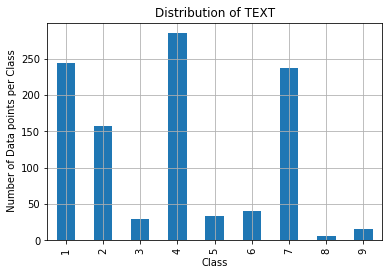

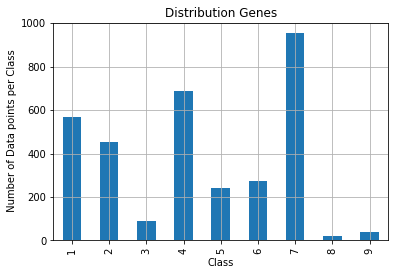

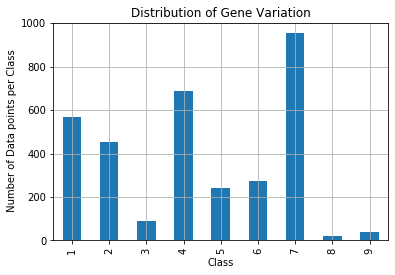

In [17]:
# Visualising using a bar shart
TEXT_Distribution.plot(kind='bar' )
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution of TEXT')
plt.grid()
plt.show()

Gene_Distribution.plot(kind='bar' )
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution Genes')
plt.grid()
plt.show()

Variation_Distribution.plot(kind='bar' )
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution of Gene Variation')
plt.grid()
plt.show()

In [18]:
# checking and handling Missing data 
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1048,1048,TSC2,R611Q,4,NaN
1049,1049,TSC2,S1498N,1,NaN
1050,1050,TSC2,F615S,1,NaN
1051,1051,TSC2,Y598C,1,NaN
1052,1052,TSC2,V705E,4,NaN
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,NaN
3317,3317,RUNX1,A122*,1,NaN
3318,3318,RUNX1,Fusions,1,NaN
3319,3319,RUNX1,R80C,4,NaN


In [0]:
#hadling missing data via imputation,replacing missing data with gene+variation
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [0]:
#Seperating ground truth from main data
X=result[['ID','Gene','Variation','TEXT']]
y_true=result[['Class']]

In [21]:
X.head(5)

,ID,Gene,Variation,TEXT
0,0,FAM58A,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,Oncogenic mutations in the monomeric Casitas B...


In [22]:
y_true.head()

,Class
0,1
1,2
2,2
3,3
4,4


In [0]:
#splitting the data into test and training data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

## Feature Extraction
-Using columnTransformer since the colums uses different transformation

In [0]:
#required library
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
# We create the preprocessor for both data type
# setting sparse_threshold=0 to deal with sparse data
preprocessor=ColumnTransformer(
   transformers= [
       ('Gene_category',OneHotEncoder(),['Gene']),
       ('Variation_category',CountVectorizer(),'Variation'),
       ('TEXT_category',TfidfVectorizer(),'TEXT')],
       sparse_threshold=0)
     



In [25]:
# Checking preprocessor parameters
preprocessor.fit(X_train)
preprocessor.get_feature_names()

['Gene_category__x0_ABL1',
 'Gene_category__x0_ACVR1',
 'Gene_category__x0_AGO2',
 'Gene_category__x0_AKT1',
 'Gene_category__x0_AKT2',
 'Gene_category__x0_AKT3',
 'Gene_category__x0_ALK',
 'Gene_category__x0_APC',
 'Gene_category__x0_AR',
 'Gene_category__x0_ARAF',
 'Gene_category__x0_ARID1B',
 'Gene_category__x0_ARID2',
 'Gene_category__x0_ARID5B',
 'Gene_category__x0_ASXL1',
 'Gene_category__x0_ASXL2',
 'Gene_category__x0_ATM',
 'Gene_category__x0_ATR',
 'Gene_category__x0_ATRX',
 'Gene_category__x0_AURKA',
 'Gene_category__x0_AXIN1',
 'Gene_category__x0_AXL',
 'Gene_category__x0_B2M',
 'Gene_category__x0_BAP1',
 'Gene_category__x0_BARD1',
 'Gene_category__x0_BCL10',
 'Gene_category__x0_BCL2',
 'Gene_category__x0_BCL2L11',
 'Gene_category__x0_BCOR',
 'Gene_category__x0_BRAF',
 'Gene_category__x0_BRCA1',
 'Gene_category__x0_BRCA2',
 'Gene_category__x0_BRD4',
 'Gene_category__x0_BRIP1',
 'Gene_category__x0_BTK',
 'Gene_category__x0_CARD11',
 'Gene_category__x0_CARM1',
 'Gene_category_

In [0]:
X_train=preprocessor.fit_transform(X_train) 




# Machine Learning
- we wll used SGD as it perform better in our research



In [0]:
#Libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier


calibrated_SGDClassifier= CalibratedClassifierCV(
       base_estimator=SGDClassifier())
param_grid = {
    'base_estimator__alpha': [0.00001, 0.000001]
    #'base_estimator__penalty':   ('l2', 'elasticnet')
            #'base_estimator__max_iter': [10, 50, 80]
 }
# use a full grid over all parameters
search = GridSearchCV(calibrated_SGDClassifier, param_grid, cv=5)
search.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARN

In [0]:
print(("best SGD from grid search: %.3f"
       % search.score(X_test, y_test)))

In [0]:
#Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

# Calibrated classifier
calibrated_SGDClassifier= CalibratedClassifierCV(
       base_estimator=SGDClassifier())
#Pipeline
pipe=Pipeline( steps=([
    ('preprocessor',preprocessor),
    ('model',calibrated_SGDClassifier)]))
              
param_grid={'model__base_estimator__alpha':[0.00001, 0.000001]}

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

search = GridSearchCV(pipe, param_grid, cv=5,verbose=True).fit(X_train, y_true)